In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Fitter.fitting import fitting
from Fitter.over_specification import over_specification

In [2]:
# calibrate the Hagan SABR model to input data
# The variable results is a dictionary which stores the ivols, ivols_diff(ivols-market ivols) and parameters of SABR 
# for unconstraint calibration and constraint calibration with beta/rho/alpha/vega fixed to specific values
results=fitting('market_data.xlsx')

In [3]:
# constraint calibration results of Hagan SABR model with specific parameter fixed to specific numbers
beta_check=results['beta_check']
alpha_check=results['alpha_check']
rho_check=results['rho_check']
vega_check=results['vega_check']

**Beta Testing**

The aim is this overspecification test is to quantify the calibration quality of the Hagan approximations, and how this would be influenced by the particular $\beta$ parameter. With $\beta$ fixed, we calibrate another three parameters: $\alpha$, $\rho$ and $\nu$. We have repeated the calibration using:

$\beta=0,$

$\beta=0.3,$

$\beta=0.5,$

$\beta=0.7,$

$\beta=1.$

We also give the optimal calibration results with $\beta$ being flexible to yield the best optimization results.

From the plots below, it seems that the main effect of $\beta$ is a change in the smile slope, which will get more pronounced as $\beta$ moves from 1 to 0 (representing a switch from lognormal to normal). And of all those betas, $\beta=0.3$ and $\beta=0.5$ give the best fitting performance while the worst is given by $\beta=0$.

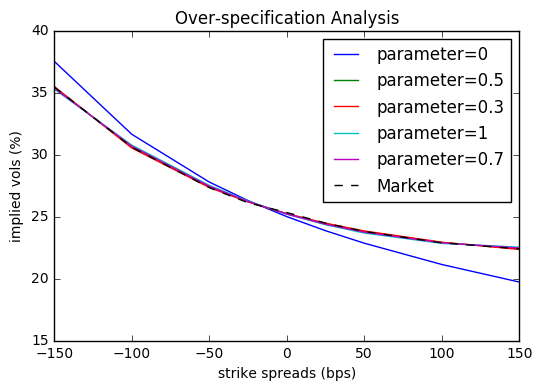

In [4]:
# conduct over-specification analysis on parameter beta
over_specification(beta_check)

**Rho Testing**

Same calibration process is applied to $\rho$ using:

$\rho=0,$

$\rho=-0.3,$

$\rho=-0.5,$

$\rho=-0.7,$

$\rho=-0.9.$

I can hardly see any huge changes in the smile for rhos from 0 to -0.9. The smile is relatively steeper and of less convexity for rho closer to -1. And the effects of $\rho$ and of $\beta$ are similar，both on smile slope.

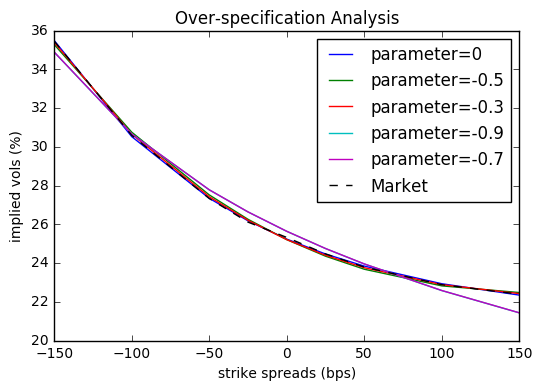

In [5]:
# conduct over-specification analysis on parameter rho
over_specification(rho_check)

**Alpha Testing**

Same calibration process is applied to $\alpha$ using:

$\alpha=0.2,$

$\alpha=0.4,$

$\alpha=0.6$

The parameter $\alpha$ has a very slight impact on the vol smile. Theoretically, it should move up and down the ivol smile with almost no changes on the smile shape, but here the effect is more complex.

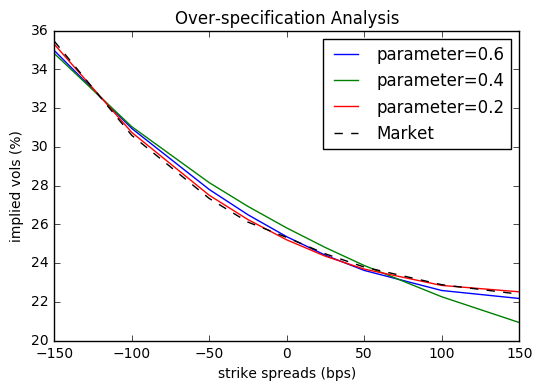

In [6]:
# conduct over-specification analysis on parameter alpha
over_specification(alpha_check)

**Vega Testing**

Same calibration process is applied to $\nu$ using:

$\nu=0.2,$

$\nu=0.4,$

$\nu=0.6$

From the plot below, it seems that higher vega leads to higher ivols for deep-in-the-money and out-of-the-money options.

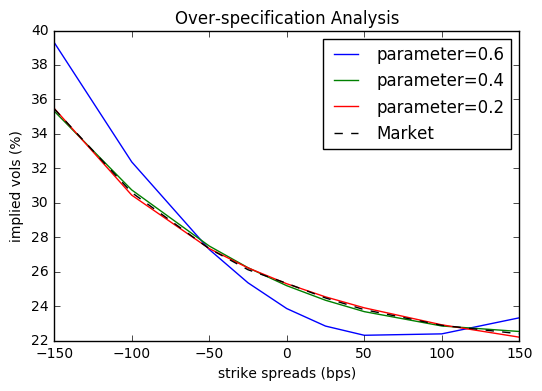

In [7]:
# conduct over-specification analysis on parameter vega
over_specification(vega_check)